# FitFam Community Analysis

This notebook analyzes the FitFam community data to understand participation, leadership, and engagement dynamics.

## Objectives
1. **Data Understanding & Cleaning**: Prepare data for analysis.
2. **Descriptive Analysis**: Overview of growth, demographics, and geography.
3. **Leadership Analysis**: Identify key leaders and their impact.
4. **Retention & Engagement**: Analyze user consistency and churn.
5. **KPIs**: Define and calculate key performance indicators.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from data_loader import FitFamDataLoader

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
# Set font for Chinese characters
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

## 1. Data Loading and Cleaning

In [4]:
loader = FitFamDataLoader()
df = loader.get_unified_data()

print(f"Total Records: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
df.head()

Total Records: 405861
Columns: ['event_id', 'user_id', 'checked_in', 'is_leader', 'created_at_attendance', 'updated_at', 'id_attendance', 'user_id_organizer', 'recurring_group_id', 'location_id', 'city_name', 'description', 'to_bring', 'start_time', 'end_time', 'registration_start', 'registration_end', 'max_attendees', 'frequency_details', 'contact_name', 'contact_wechat', 'is_aqi_dependent', 'is_featured', 'members_only', 'status', 'created_at_organizer', 'updated_at_organizer', 'location_name', 'location_id_redundant', 'name_en_loc', 'city_id', 'id_city', 'name_city', 'id_user', 'username', 'created_at_user', 'gender', 'city', 'province']


,event_id,user_id,checked_in,is_leader,created_at_attendance,updated_at,id_attendance,user_id_organizer,recurring_group_id,location_id,...,name_en_loc,city_id,id_city,name_city,id_user,username,created_at_user,gender,city,province
0,1,1,NaN,0,2018-08-06 11:10:14,2018-08-06 11:10:14,1,None,1,1,...,{{ Location/Name }},1,1,"{""en"": ""Shanghai"", ""zh"": ""上海""}",1,S1MQJN4SX,2018-08-05 16:02:34,0.0,,
1,1,3,NaN,0,2018-08-06 21:42:05,2018-08-06 21:42:05,1,None,1,1,...,{{ Location/Name }},1,1,"{""en"": ""Shanghai"", ""zh"": ""上海""}",3,rkoiSP4BQ,2018-08-05 19:55:15,0.0,,
2,3,1,1.0,0,2018-08-12 12:12:50,2018-08-12 12:12:50,3,None,2,2,...,SH naked Hub Taixing,1,1,"{""en"": ""Shanghai"", ""zh"": ""上海""}",1,S1MQJN4SX,2018-08-05 16:02:34,0.0,,
3,3,3,0.0,0,2018-08-07 14:39:25,2018-08-07 14:39:25,3,None,2,2,...,SH naked Hub Taixing,1,1,"{""en"": ""Shanghai"", ""zh"": ""上海""}",3,rkoiSP4BQ,2018-08-05 19:55:15,0.0,,
4,3,4,1.0,0,2018-08-07 14:39:54,2018-08-07 14:39:54,3,None,2,2,...,SH naked Hub Taixing,1,1,"{""en"": ""Shanghai"", ""zh"": ""上海""}",4,r1IscwNBX,2018-08-05 20:16:30,1.0,Luwan,Shanghai


In [5]:
# Check for missing values
missing = df.isnull().sum()
missing[missing > 0]

checked_in            11082
user_id_organizer    405861
max_attendees        121480
frequency_details       232
is_aqi_dependent     121295
dtype: int64

In [6]:
# Convert dates to datetime if not already
date_cols = ['start_time', 'created_at_attendance', 'created_at_user']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Extract Year-Month for trends
df['month_year'] = df['start_time'].dt.to_period('M')

## 2. Descriptive Analysis

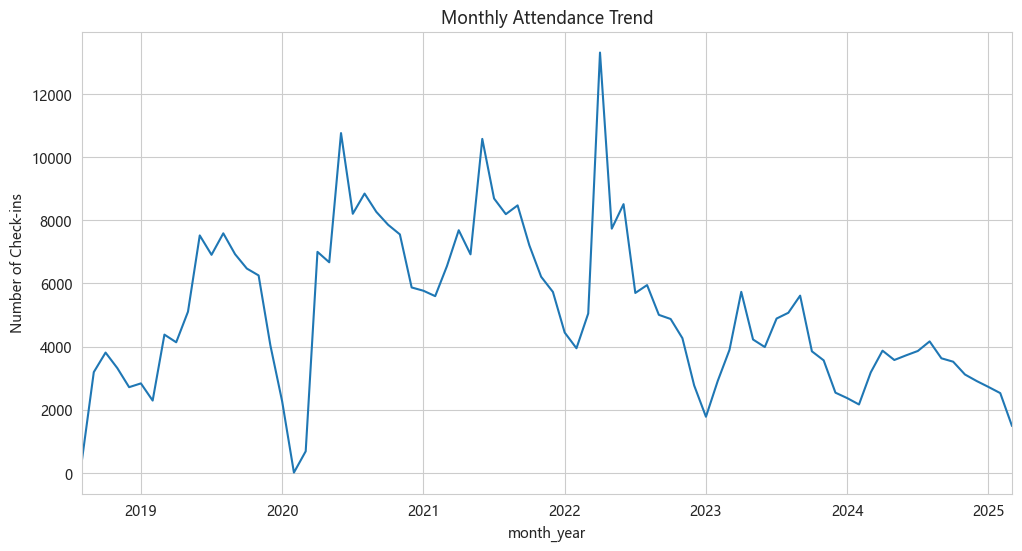

In [5]:
# Participation over time
monthly_attendance = df.groupby('month_year').size()
monthly_attendance.plot(kind='line', title='Monthly Attendance Trend')
plt.ylabel('Number of Check-ins')
plt.show()

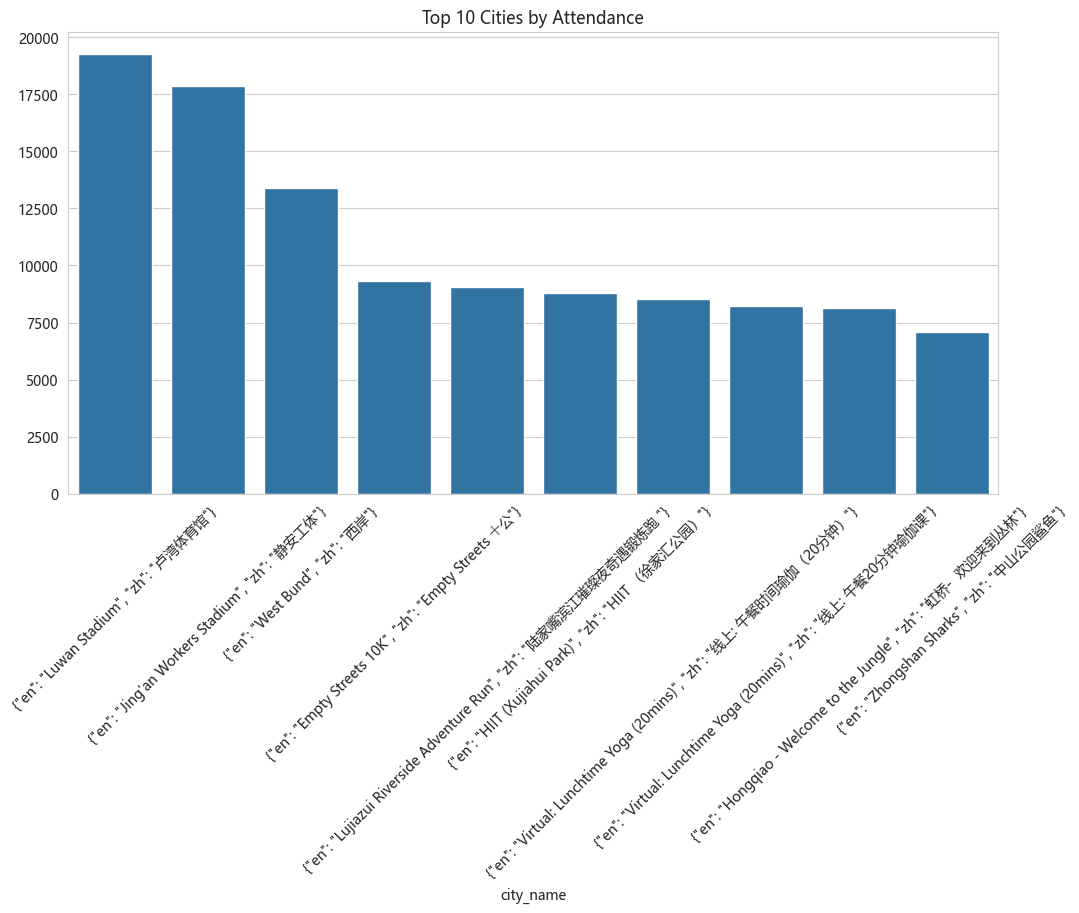

In [7]:
# Attendance by City
city_counts = df['city_name'].value_counts().head(10)
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Top 10 Cities by Attendance')
plt.xticks(rotation=45)
plt.show()

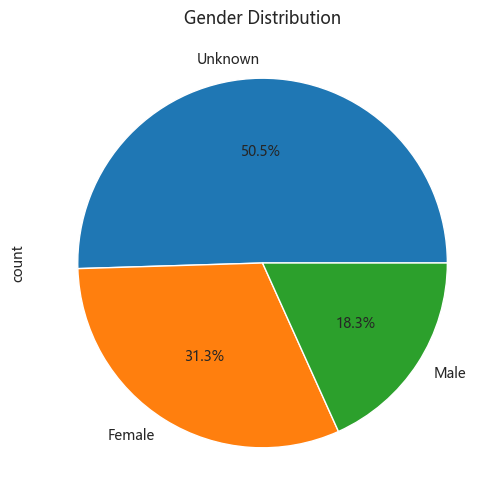

In [8]:
# Gender Distribution
gender_counts = df['gender'].value_counts()
# 1: Male, 2: Female, 0: Unknown (WeChat standard)
gender_map = {1: 'Male', 2: 'Female', 0: 'Unknown'}
df['gender_label'] = df['gender'].map(gender_map)
df['gender_label'].value_counts().plot.pie(autopct='%1.1f%%', title='Gender Distribution')
plt.show()

## 3. Leadership Analysis

In [9]:
# Identify Leaders
# Assuming is_leader in attendance marks if they led that specific event
leaders = df[df['is_leader'] == 1]
print(f"Total Leadership Instances: {len(leaders)}")
print(f"Unique Leaders: {leaders['user_id'].nunique()}")

# Top Leaders
top_leaders = leaders['user_id'].value_counts().head(10)
# Get usernames
top_leader_names = df[df['user_id'].isin(top_leaders.index)][['user_id', 'username']].drop_duplicates().set_index('user_id')
top_leaders_named = top_leaders.to_frame(name='events_led').join(top_leader_names)
top_leaders_named

Total Leadership Instances: 29684
Unique Leaders: 449


,events_led,username
user_id,,
13957,758,7go-yuzwC
1411,718,HJ3wzBQdQ
534,517,S1knKrKDQ
1889,500,BkCWNOBum
595,492,Hk4Icg5Dm
35,490,SyN6IXOLX
6,488,Bk_hBt6HX
66,468,r1HGvWtLm
23353,410,EVD4va35N


## 4. Retention Analysis

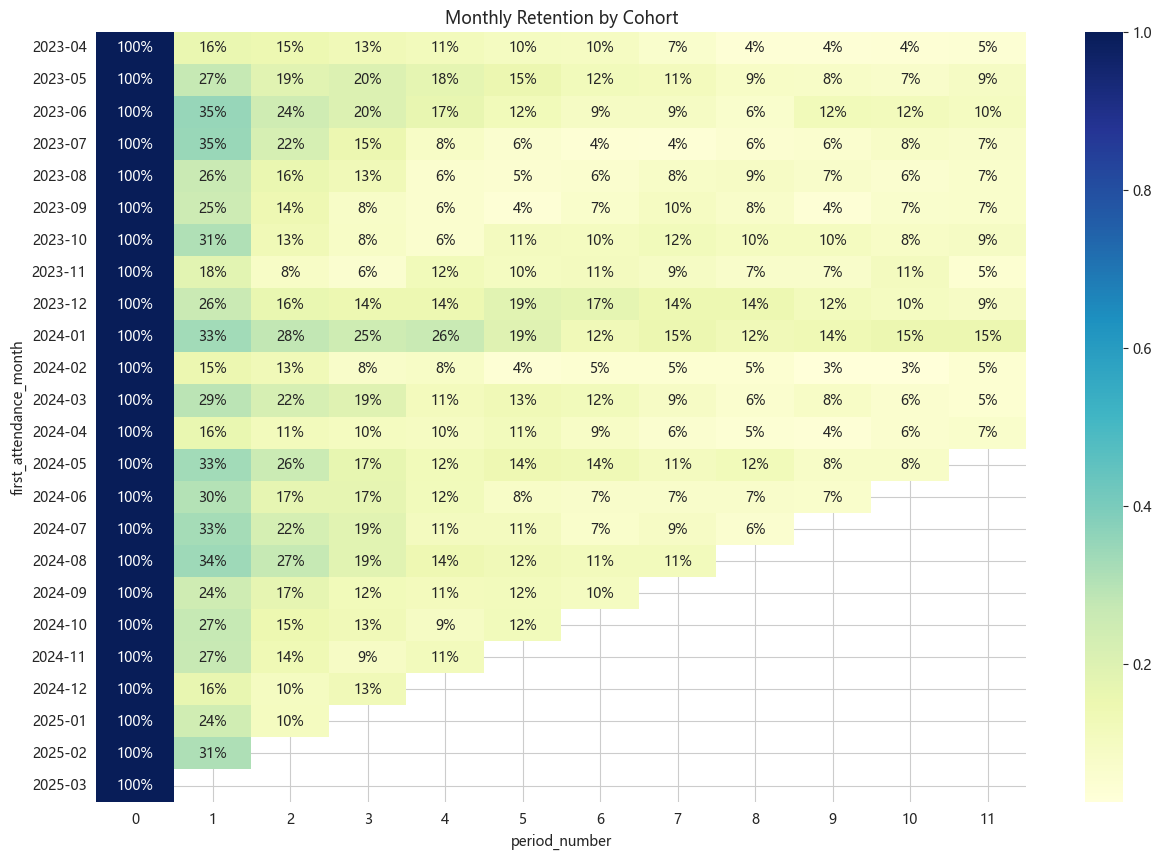

In [10]:
# Cohort Analysis
# Define cohort by join month
df['join_month'] = df['created_at_user'].dt.to_period('M')

# Calculate retention matrix (simplified)
# For each user, find their first attendance month
first_attendance = df.groupby('user_id')['start_time'].min().dt.to_period('M')
df['first_attendance_month'] = df['user_id'].map(first_attendance)

# Group by cohort (first attendance month) and activity month
cohort_data = df.groupby(['first_attendance_month', 'month_year'])['user_id'].nunique().reset_index()
cohort_data['period_number'] = (cohort_data['month_year'] - cohort_data['first_attendance_month']).apply(lambda x: x.n)

# Pivot
cohort_pivot = cohort_data.pivot_table(index='first_attendance_month', columns='period_number', values='user_id')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

plt.figure(figsize=(15, 10))
sns.heatmap(retention_matrix.iloc[-24:, :12], annot=True, fmt='.0%', cmap='YlGnBu') # Last 2 years, first 12 months
plt.title('Monthly Retention by Cohort')
plt.show()